#             $$\text{Gnu Radio Companion with Machine Learning} $$

In [1]:
import pandas as pd
import numpy as np
import warnings 
from Sinals_ import  Knn_apply , merge_two
from sklearn.neighbors import KNeighborsClassifier
import torch
import torch.nn as nn
from Plots_model import RandomizedSearchCVWrapper
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
Clear = np.load("/content/drive/MyDrive/AICT_2/Data_/CLEAR.npy")
WIFI_1M = np.load("/content/drive/MyDrive/AICT_2/Data_/WIFI.npy")
LTE_1M = np.load("/content/drive/MyDrive/AICT_2/Data_/LTE_1M.npy")



In [3]:
df = Knn_apply(Clear, WIFI_1M, LTE_1M, sliced= 1000000,shuffle= True, random_state=42,
                  n_neighbors=21, weights='distance', p=2, test_size= 0.275) ; data = df.dataframe ; data


,Signals,Real,Imag,Label
0,CLEAR,-0.000061,0.000000,0
1,CLEAR,0.000031,-0.000031,0
2,CLEAR,-0.000031,-0.000061,0
3,CLEAR,0.000000,0.000183,0
4,CLEAR,-0.000092,0.000214,0
...,...,...,...,...
2999995,LTE,0.000305,-0.000183,2
2999996,LTE,0.000336,-0.000122,2
2999997,LTE,0.000031,-0.000275,2
2999998,LTE,0.000031,-0.000061,2


In [4]:
X_train, X_test, y_train, y_test =df.Training(data)

print("x_train:", X_train.shape)
print("y_train:", X_test.shape)
print("x_test:", y_train.shape)
print("y_test:", y_test.shape)


x_train: (2174999, 2)
y_train: (825001, 2)
x_test: (2174999, 1)
y_test: (825001, 1)


In [5]:
df.Knn()  

              precision    recall  f1-score   support

       CLEAR       0.36      0.47      0.41    274904
        WIFI       0.41      0.37      0.39    274597
         LTE       0.34      0.27      0.30    275500

    accuracy                           0.37    825001
   macro avg       0.37      0.37      0.37    825001
weighted avg       0.37      0.37      0.37    825001



In [6]:
df.metrics

,Score,Accuracy,F1-Score,Recall
0,0.369081,0.369081,0.365061,0.369081


In [7]:
df.matrix

array([[128919,  69146,  76839],
       [105407, 101212,  67978],
       [121950,  79189,  74361]])

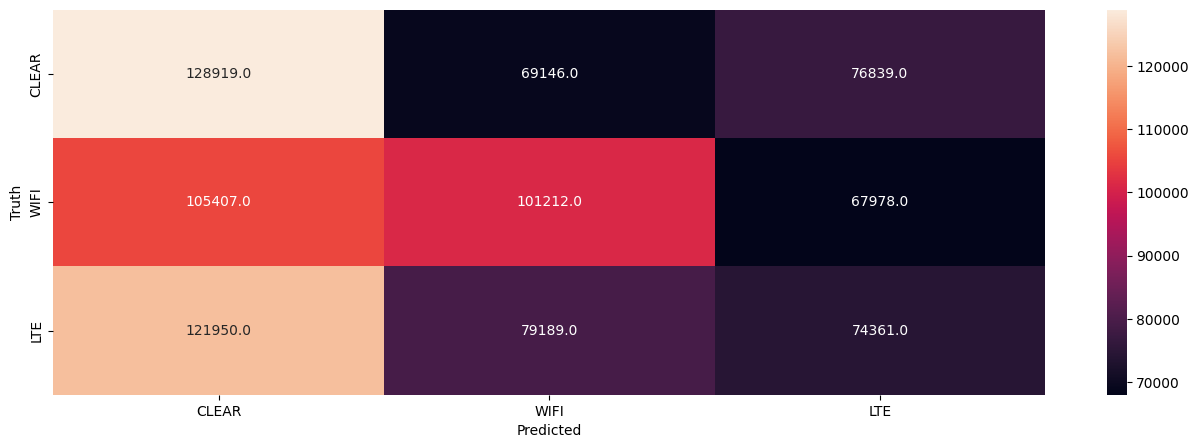

In [8]:
df.confusion_matrix()

### WIFI & CLEAR

In [13]:
df = merge_two(Clear, WIFI_1M, sliced= 4000000,shuffle= True, random_state=42,
                  n_neighbors=21, weights='uniform', p=1, test_size= 0.225) ; data = df.dataframe ; data


,Signals,Real,Imag,Label
0,CLEAR,-0.000061,0.000000,0
1,CLEAR,0.000031,-0.000031,0
2,CLEAR,-0.000031,-0.000061,0
3,CLEAR,0.000000,0.000183,0
4,CLEAR,-0.000092,0.000214,0
...,...,...,...,...
7999995,SINAL,-0.000458,-0.000122,1
7999996,SINAL,-0.000092,-0.000031,1
7999997,SINAL,-0.000031,0.000153,1
7999998,SINAL,-0.000092,0.000000,1


In [14]:
X_train, X_test, y_train, y_test =df.Training(data)

df.Knn()


              precision    recall  f1-score   support

       CLEAR       0.51      0.57      0.54    900756
       SINAL       0.51      0.44      0.47    899244

    accuracy                           0.51   1800000
   macro avg       0.51      0.51      0.50   1800000
weighted avg       0.51      0.51      0.50   1800000



In [ ]:
df.matrix

array([[5356, 3611],
       [4808, 4225]], dtype=int64)

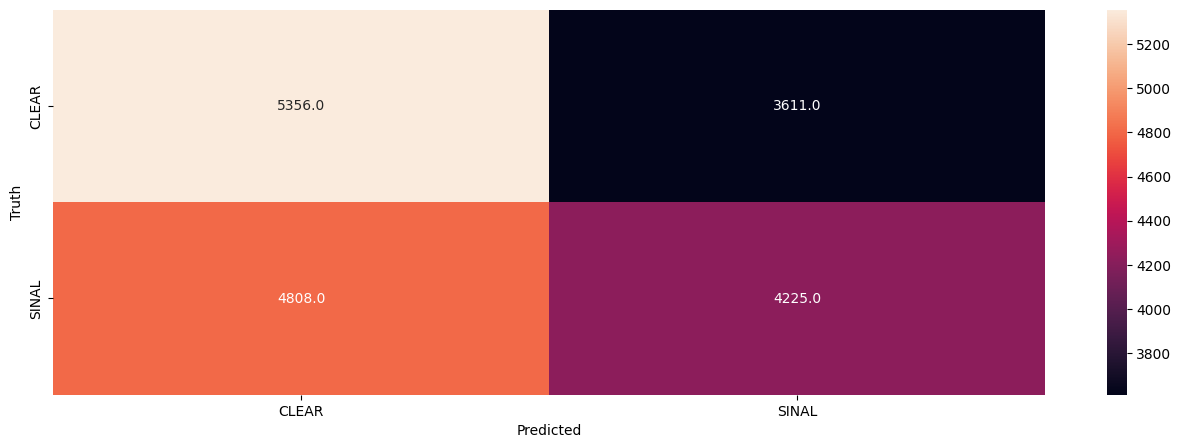

In [ ]:
df.confusion_matrix()